## Author: Sri Sudheera Chitipolu
   <img src="https://avatars.githubusercontent.com/u/22390581?v=4" align="left"
     alt="Size Limit logo by Anton Lovchikov" width="100" height="100">
##### Github: https://github.com/sudheera96
##### Linkedin: https://www.linkedin.com/in/sri-sudheera-chitipolu/

### Data gathering

In [0]:
# get text data from url
import urllib.request
urllib.request.urlretrieve("https://www.gutenberg.org/cache/epub/514/pg514.txt" , "/tmp/littlewomen.txt")

Out[6]: ('/tmp/littlewomen.txt', <http.client.HTTPMessage at 0x7f6316effa30>)

In [0]:
# moved file from tmp folder to data folder of dbfs
dbutils.fs.mv("file:/tmp/littlewomen.txt","dbfs:/data/littlewomen.txt")

Out[7]: True

In [0]:
# transfer the data file into Spark
LittleWomenRawRDD= sc.textFile("dbfs:/data/littlewomen.txt")

### Cleaning the data

In [0]:
# break down the data with flatmapping
# change any capitalized to a lower case
# remove any spaces 
# splitting up sentences into words.
LittleWomenMessyTokensRDD = LittleWomenRawRDD.flatMap(lambda line: line.lower().strip().split(" "))

In [0]:
# remove punctuations
# use re library by importing it
import re
LittleWomenCleanTokensRDD = LittleWomenMessyTokensRDD.map(lambda letter: re.sub(r'[^A-Za-z]', '', letter))

In [0]:
# remove stop words
from pyspark.ml.feature import StopWordsRemover
remover = StopWordsRemover()
stopwords = remover.getStopWords()
LittleWomenWordsRDD = LittleWomenCleanTokensRDD.filter(lambda PointLessW: PointLessW not in stopwords)

In [0]:
# remove empty spaces
LittleWomenEmptyRemoveRDD = LittleWomenWordsRDD.filter(lambda x: x != "")

### Processing data

In [0]:
# map words to immediate keyvlue pairs
LittleWomenPairsRDD = LittleWomenEmptyRemoveRDD.map(lambda word: (word,1))

In [0]:
# tranform pairs to word count
LittleWomenWordCountRDD = LittleWomenPairsRDD.reduceByKey(lambda acc, value: acc + value)

In [0]:
# sort words in decending order
LittleWomenResults = LittleWomenWordCountRDD.map(lambda x: (x[1], x[0])).sortByKey(False).take(10)
print(LittleWomenResults)

[(1247, 'jo'), (826, 'said'), (731, 'little'), (703, 'one'), (633, 'meg'), (583, 'like'), (571, 'amy'), (547, 'laurie'), (540, 'dont'), (430, 'good')]

### Charting

Out[16]:

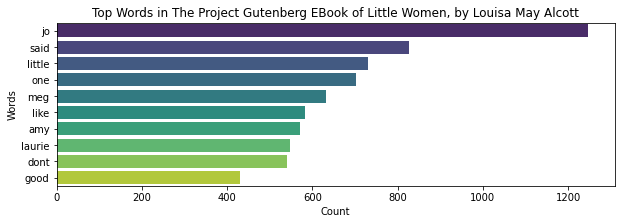

Text(0.5, 1.0, 'Top Words in The Project Gutenberg EBook of Little Women, by Louisa May Alcott')

In [0]:
# visualize the results
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

source = 'The Project Gutenberg EBook of Little Women, by Louisa May Alcott'
title = 'Top Words in ' + source
xlabel = 'Count'
ylabel = 'Words'

df = pd.DataFrame.from_records(LittleWomenResults, columns =[xlabel, ylabel]) 
plt.figure(figsize=(10,3))
sns.barplot(xlabel, ylabel, data=df, palette="viridis").set_title(title)

In [0]:
plt.savefig('LittleWomen_Results.png')

In [0]:
pip install wordcloud

Python interpreter will be restarted.
Requirement already satisfied: wordcloud in /local_disk0/.ephemeral_nfs/envs/pythonEnv-411f3440-10fe-4481-9d3f-4c30439eb66a/lib/python3.8/site-packages (1.8.1)
Requirement already satisfied: numpy>=1.6.1 in /databricks/python3/lib/python3.8/site-packages (from wordcloud) (1.19.2)
Requirement already satisfied: matplotlib in /databricks/python3/lib/python3.8/site-packages (from wordcloud) (3.2.2)
Requirement already satisfied: pillow in /local_disk0/.ephemeral_nfs/envs/pythonEnv-411f3440-10fe-4481-9d3f-4c30439eb66a/lib/python3.8/site-packages (from wordcloud) (8.2.0)
Requirement already satisfied: cycler>=0.10 in /databricks/python3/lib/python3.8/site-packages (from matplotlib->wordcloud) (0.10.0)
Requirement already satisfied: kiwisolver>=1.0.1 in /databricks/python3/lib/python3.8/site-packages (from matplotlib->wordcloud) (1.3.0)
Requirement already satisfied: pyparsing!=2.0.4,!=2.1.2,!=2.1.6,>=2.0.1 in /databricks/python3/lib/python3.8/site-packages (from matplotlib->wordcloud) (2.4.7)
Requirement already satisfied: python-dateutil>=2.1 in /databricks/python3/lib/python3.8/site-packages (from matplotlib->wordcloud) (2.8.1)
Requirement already satisfied: six in /usr/local/lib/python3.8/site-packages (from cycler>=0.10->matplotlib->wordcloud) (1.15.0)
WARNING: You are using pip version 20.2.4; however, version 21.0.1 is available.
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-411f3440-10fe-4481-9d3f-4c30439eb66a/bin/python -m pip install --upgrade pip' command.
Python interpreter will be restarted.

In [0]:
pip install nltk

Python interpreter will be restarted.
Collecting nltk
 Downloading nltk-3.6.1-py3-none-any.whl (1.5 MB)
Collecting click
 Downloading click-7.1.2-py2.py3-none-any.whl (82 kB)
Requirement already satisfied: joblib in /databricks/python3/lib/python3.8/site-packages (from nltk) (0.17.0)
Collecting tqdm
 Downloading tqdm-4.60.0-py2.py3-none-any.whl (75 kB)
Collecting regex
 Downloading regex-2021.4.4-cp38-cp38-manylinux2014_x86_64.whl (733 kB)
Installing collected packages: click, tqdm, regex, nltk
Successfully installed click-7.1.2 nltk-3.6.1 regex-2021.4.4 tqdm-4.60.0
WARNING: You are using pip version 20.2.4; however, version 21.0.1 is available.
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-411f3440-10fe-4481-9d3f-4c30439eb66a/bin/python -m pip install --upgrade pip' command.
Python interpreter will be restarted.

In [0]:
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data] | 
[nltk_data] | Downloading package cmudict to /root/nltk_data...
[nltk_data] | Unzipping corpora/cmudict.zip.
[nltk_data] | Downloading package gazetteers to /root/nltk_data...
[nltk_data] | Unzipping corpora/gazetteers.zip.
[nltk_data] | Downloading package genesis to /root/nltk_data...
[nltk_data] | Unzipping corpora/genesis.zip.
[nltk_data] | Downloading package gutenberg to /root/nltk_data...
[nltk_data] | Unzipping corpora/gutenberg.zip.
[nltk_data] | Downloading package inaugural to /root/nltk_data...
[nltk_data] | Unzipping corpora/inaugural.zip.
[nltk_data] | Downloading package movie_reviews to
[nltk_data] | /root/nltk_data...
[nltk_data] | Unzipping corpora/movie_reviews.zip.
[nltk_data] | Downloading package names to /root/nltk_data...
[nltk_data] | Unzipping corpora/names.zip.
[nltk_data] | Downloading package shakespeare to /root/nltk_data...
[nltk_data] | Unzipping corpora/shakespeare.zip.
[nltk_data] | Downloading package stopwords to /root/nltk_data...
[nltk_data] | Unzipping corpora/stopwords.zip.
[nltk_data] | Downloading package treebank to /root/nltk_data...
[nltk_data] | Unzipping corpora/treebank.zip.
[nltk_data] | Downloading package twitter_samples to
[nltk_data] | /root/nltk_data...
[nltk_data] | Unzipping corpora/twitter_samples.zip.
[nltk_data] | Downloading package omw to /root/nltk_data...
[nltk_data] | Unzipping corpora/omw.zip.
[nltk_data] | Downloading package wordnet to /root/nltk_data...
[nltk_data] | Unzipping corpora/wordnet.zip.
[nltk_data] | Downloading package wordnet_ic to /root/nltk_data...
[nltk_data] | Unzipping corpora/wordnet_ic.zip.
[nltk_data] | Downloading package words to /root/nltk_data...
[nltk_data] | Unzipping corpora/words.zip.
[nltk_data] | Downloading package maxent_ne_chunker to
[nltk_data] | /root/nltk_data...
[nltk_data] | Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] | Downloading package punkt to /root/nltk_data...
[nltk_data] | Unzipping tokenizers/punkt.zip.
[nltk_data] | Downloading package snowball_data to
[nltk_data] | /root/nltk_data...
[nltk_data] | Downloading package averaged_perceptron_tagger to
[nltk_data] | /root/nltk_data...
[nltk_data] | Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] | 
[nltk_data] Done downloading collection popular
Out[4]: True

Preprocessed Data: ﻿the project gutenberg ebook little women , louisa may alcott ebook use anyone anywhere cost almost restrictions whatsoever may copy , give away re-use terms project gutenberg license included ebook online www gutenberg org title : little women author : louisa may alcott posting date : september 13 , 2008 [ ebook # 514 ] release date : may , 1996 [ file last updated august 19 , 2010 ] language : english * * * start project gutenberg ebook little women * * * little women louisa may alcott contents part 1 one playing pilgrims two merry christmas three laurence boy four burdens five neighborly six beth finds palace beautiful seven amy 's valley humiliation eight jo meets apollyon nine meg goes vanity fair ten p c p eleven experiments twelve camp laurence thirteen castles air fourteen secrets fifteen telegram sixteen letters seventeen little faithful eighteen dark days nineteen amy 's twenty confidential twenty-one laurie makes mischief , jo makes peace twenty-two pleasant meadows twenty-three aunt march settles question part 2 twenty-four gossip twenty-five first wedding twenty-six artistic attempts twenty-seven literary lessons twenty-eight domestic experiences twenty-nine calls thirty consequences thirty-one foreign correspondent thirty-two tender troubles thirty-three jo 's journal thirty-four friend thirty-five heartache thirty-six beth 's secret thirty-seven new impressions thirty-eight shelf thirty-nine lazy laurence forty valley shadow forty-one learning forget forty-two alone forty-three surprises forty-four lord lady forty-five daisy demi forty-six umbrella forty-seven harvest time chapter one playing pilgrims '' christmas wo n't christmas without presents , '' grumbled jo , lying rug '' 's dreadful poor ! '' sighed meg , looking old dress '' n't think 's fair girls plenty pretty things , girls nothing , '' added little amy , injured sniff '' 've got father mother , , '' said beth contentedly corner four young faces firelight shone brightened cheerful words , darkened jo said sadly , `` n't got father , shall long time `` n't say '' perhaps never , '' silently added , thinking father far away , fighting nobody spoke minute ; meg said altered tone , `` know reason mother proposed presents christmas going hard winter everyone ; thinks ought spend money pleasure , men suffering army ca n't much , make little sacrifices , ought gladly afraid n't , '' meg shook head , thought regretfully pretty things wanted '' n't think little spend would good we've got dollar , army would n't much helped giving agree expect anything mother , want buy _undine sintran_ 've wanted long , '' said jo , bookworm '' planned spend mine new music , '' said beth , little sigh , one heard hearth brush kettle-holder '' shall get nice box faber 's drawing pencils ; really need , '' said amy decidedly '' mother n't say anything money , wo n't wish us give everything let 's buy want , little fun ; 'm sure work hard enough earn , '' cried jo , examining heels shoes gentlemanly manner '' know -- teaching tiresome children nearly day , i'm longing enjoy home , '' began meg , complaining tone '' n't half hard time , '' said jo `` would like shut hours nervous , fussy old lady , keeps trotting , never satisfied , worries till 're ready fly window cry ? '' `` 's naughty fret , think washing dishes keeping things tidy worst work world makes cross , hands get stiff , ca n't practice well `` beth looked rough hands sigh one could hear time '' n't believe suffer , '' cried amy , `` go school impertinent girls , plague n't know lessons , laugh dresses , label father n't rich , insult nose n't nice `` '' mean libel , 'd say , talk labels , papa pickle bottle , '' advised jo , laughing '' know mean , need n't statirical proper use good words , improve vocabilary , '' returned amy , dignity '' n't peck one another , children n't wish money papa lost little , jo ? dear ! happy good we'd , worries ! '' said meg , could remember better times '' said day

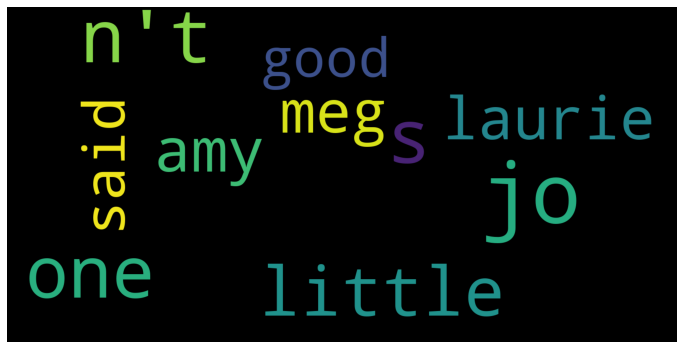

In [0]:
import nltk
import wordcloud
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

class WordCloudGeneration:
    def preprocessing(self, data):
        # convert all words to lowercase
        data = [item.lower() for item in data]
        # load the stop_words of english
        stop_words = set(stopwords.words('english'))
        # concatenate all the data with spaces.
        paragraph = ' '.join(data)
        # tokenize the paragraph using the inbuilt tokenizer
        word_tokens = word_tokenize(paragraph) 
        # filter words present in stopwords list 
        preprocessed_data = ' '.join([word for word in word_tokens if not word in stop_words])
        print("\n Preprocessed Data: " ,preprocessed_data)
        return preprocessed_data

    def create_word_cloud(self, final_data):
        # initiate WordCloud object with parameters width, height, maximum font size and background color
        # call the generate method of WordCloud class to generate an image
        wordcloud = WordCloud(width=1600, height=800, max_words=10, max_font_size=200, background_color="black").generate(final_data)
        # plt the image generated by WordCloud class
        plt.figure(figsize=(12,10))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

wordcloud_generator = WordCloudGeneration()
# you may uncomment the following line to use custom input
# input_text = input("Enter the text here: ")
import urllib.request
url = "https://www.gutenberg.org/cache/epub/514/pg514.txt"
request = urllib.request.Request(url)
response = urllib.request.urlopen(request)
input_text = response.read().decode('utf-8')

input_text = input_text.split('.')
clean_data = wordcloud_generator.preprocessing(input_text)
wordcloud_generator.create_word_cloud(clean_data)

